<a href="https://colab.research.google.com/github/Sara19598/Cardiovascular-Risk-Prediction-ML-Classification/blob/main/Cardiovascular_Risk_Prediction_Poonam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Project**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

# **Data Description :**

**Variables :**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral :**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**•Predict variable (desired target)**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

# **Connecting with the Drive-**

In [53]:
#loading the Required libraries-
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date           #Used for analysing the date variable
from scipy import stats             #used for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity
from sklearn.model_selection import train_test_split
import os

In [54]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Loading data set of csv file
df=pd.read_csv('/content/drive/MyDrive/Capstone Project 3- ML Classification/data_cardiovascular_risk.csv')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [56]:
#To view the dataset 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00,F,YES,3.00,0.00,0,0,0,221.00,148.00,85.00,NaN,90.00,80.00,1
1,1,36,4.00,M,NO,0.00,0.00,0,1,0,212.00,168.00,98.00,29.77,72.00,75.00,0
2,2,46,1.00,F,YES,10.00,0.00,0,0,0,250.00,116.00,71.00,20.35,88.00,94.00,0
3,3,50,1.00,M,YES,20.00,0.00,0,1,0,233.00,158.00,88.00,28.26,68.00,94.00,1
4,4,64,1.00,F,YES,30.00,0.00,0,0,0,241.00,136.50,85.00,26.42,70.00,77.00,0


In [57]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.00,F,NO,0.00,0.00,0,0,0,261.00,123.50,79.00,29.28,70.00,103.00,0
3386,3386,46,1.00,F,NO,0.00,0.00,0,0,0,199.00,102.00,56.00,21.96,80.00,84.00,0
3387,3387,44,3.00,M,YES,3.00,0.00,0,1,0,352.00,164.00,119.00,28.92,73.00,72.00,1
3388,3388,60,1.00,M,NO,0.00,NaN,0,1,0,191.00,167.00,105.00,23.01,80.00,85.00,0
3389,3389,54,3.00,F,NO,0.00,0.00,0,0,0,288.00,124.00,77.00,29.88,79.00,92.00,0


In [58]:
#Shape of the dataset
df.shape

(3390, 17)

In [59]:
#To get the columns of the dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [60]:
# number of unique values that each column contains
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [61]:
#showing the datatype of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [62]:
#Summary of the dataset
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,1694.50,49.54,1.97,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,978.75,8.59,1.02,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,847.25,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,1694.50,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2541.75,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


# ***Data Cleaning***

In [63]:
#Checking of Missing value
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### ***Comment:- There are misisng values present in the features such as education,cigsPerDay, BPMeds, totChol, BMI,heartRate & glucose.***

In [64]:
# To remove the missing values-
df.dropna(axis=0,inplace=True)
df.shape

(2927, 17)

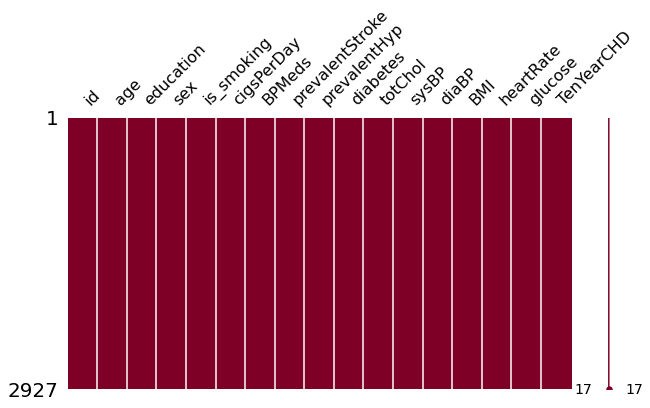

In [65]:
#Visualization of NAN values in the dataset-
mno.matrix(df,figsize=(10,5),color=(0.5,0.0,0.15))

In [66]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00
mean,1692.87,49.51,1.97,9.11,0.03,0.01,0.31,0.03,237.13,132.63,82.91,25.80,75.89,81.93,0.15
std,986.03,8.60,1.02,11.88,0.17,0.08,0.46,0.16,44.61,22.33,12.08,4.13,11.97,24.11,0.36
min,1.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,836.50,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.03,68.00,71.00,0.00
50%,1689.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2547.50,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00,1.00


In [67]:
df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

### ***This shows that our Target variable is classified in "0" and "1" category which implies that we have to perform Classification model for our dataset to analyse and interpret the dataset.***

# ***Data Visualization***

**Seprate dependent and independent variables**

In [68]:
dependent_variable = 'TenYearCHD'

In [69]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['is_smoking',
 'diaBP',
 'BPMeds',
 'age',
 'totChol',
 'sysBP',
 'heartRate',
 'diabetes',
 'education',
 'id',
 'prevalentStroke',
 'BMI',
 'cigsPerDay',
 'sex',
 'prevalentHyp',
 'glucose']

In [70]:
# Divide the columns based on the type for clear management
col_Demographic = [ 'age', 'education', 'sex']

col_Behavioral = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_medical_current = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [71]:
independent_vars = df[col_Demographic + col_Behavioral + col_medical_history + col_medical_current]
dependent_vars = df[col_target]

In [72]:
independent_vars.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00,2927.00
mean,49.51,1.97,9.11,0.03,0.01,0.31,0.03,237.13,132.63,82.91,25.80,75.89,81.93,237.13,132.63,82.91,25.80,75.89,81.93
std,8.60,1.02,11.88,0.17,0.08,0.46,0.16,44.61,22.33,12.08,4.13,11.97,24.11,44.61,22.33,12.08,4.13,11.97,24.11
min,32.00,1.00,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.96,45.00,40.00,113.00,83.50,48.00,15.96,45.00,40.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.03,68.00,71.00,206.00,117.00,74.50,23.03,68.00,71.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,234.00,128.50,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,264.00,144.00,90.00,28.04,83.00,87.00
max,70.00,4.00,70.00,1.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00,600.00,295.00,142.50,56.80,143.00,394.00


In [73]:
dependent_vars.describe()

,TenYearCHD
count,2927.00
mean,0.15
std,0.36
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


**Hitogram for all the features to understand the distribution**

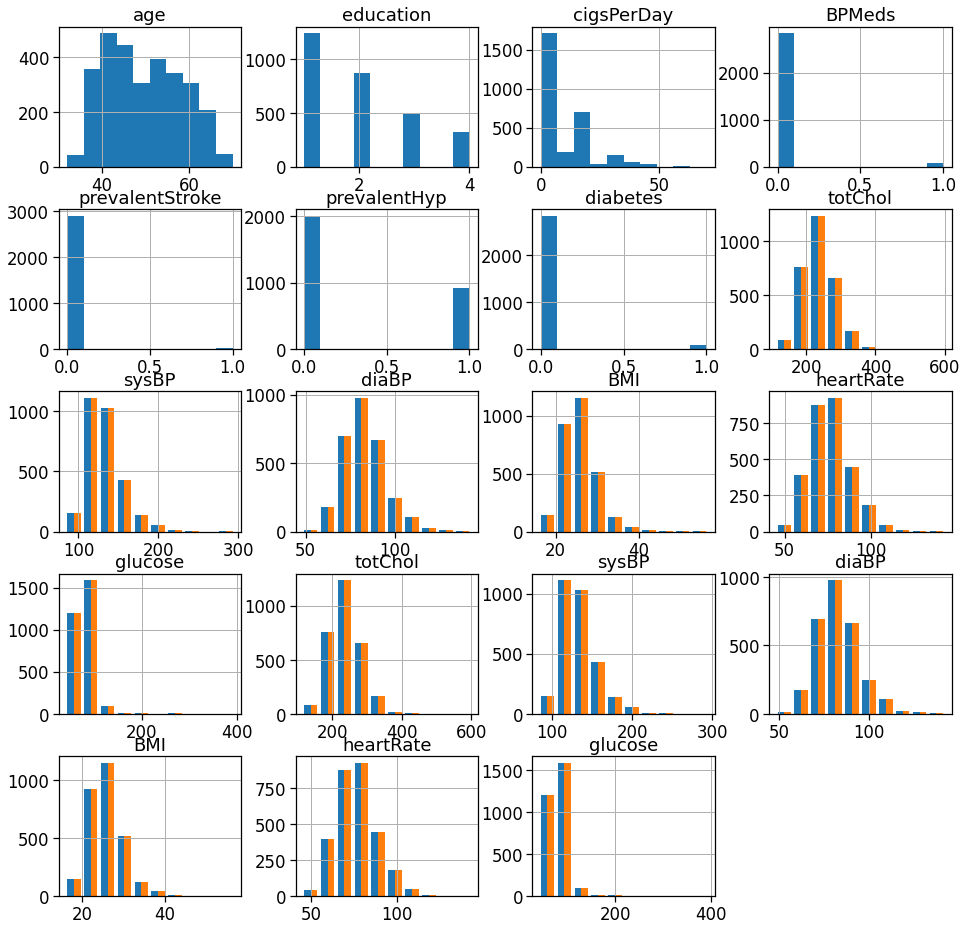

In [74]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c0d5d2210>]],
      dtype=object)

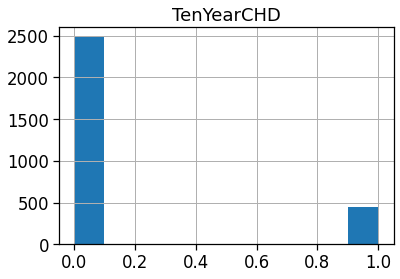

In [75]:
dependent_vars.hist()

## ***Outliers***

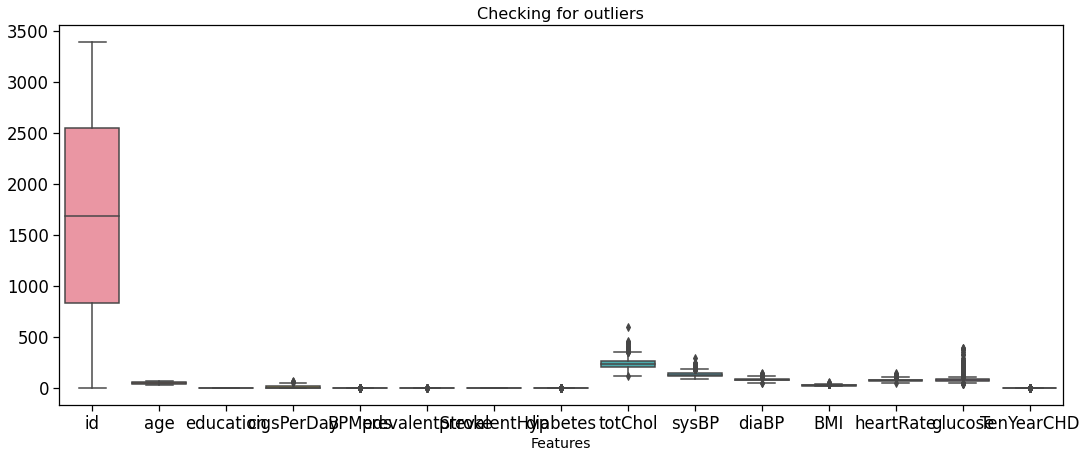

In [76]:
# Checking for Outliers
plt.figure(figsize=(18,7))
sns.boxplot(data=df)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()